Importing the required Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing and Reading the data

Import dataset: heart_failure_clinical_records_dataset.csv

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

Lets take a look at the data set

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Data Exploration

Let's first have a descriptive exploration on our data.

In [4]:
# summarize the data
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Let's select some features to explore more.

In [7]:
cdf = df[['age','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']]
cdf.head(9)

,age,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,75.0,0,1,1,0,1
1,55.0,0,0,1,0,1
2,65.0,0,0,1,1,1
3,50.0,0,0,1,0,1
4,65.0,1,0,0,0,1
5,90.0,0,1,1,1,1
6,75.0,0,0,1,0,1
7,60.0,1,0,1,1,1
8,65.0,0,0,0,0,1


We can plot each of these features:

Now, let's plot each of these features against the Death Event, to see how linear their relationship is:

Determine Y variable AS DEATH_EVENT

#change columns to lowercases for easy use

In [71]:
df.columns = df.columns.str.lower()

Making a copy of the data of death_ event, diabetes, smoking, and sex for the purpose of visualisation

In [72]:
df_vis = df.copy()
df_vis.death_event = df_vis.death_event.map({0:'Alive',1:'Dead'})
df_vis.diabetes = df_vis.diabetes.map({0:'No',1:'Yes'})
df_vis.smoking = df_vis.smoking.map({0:'No',1:'Yes'})
df_vis.sex = df_vis.sex.map({0:'Female',1:'Male'})

Visualizing the distribution of Death by heart failure in dataset blue showing alive and red showing dead in the data set

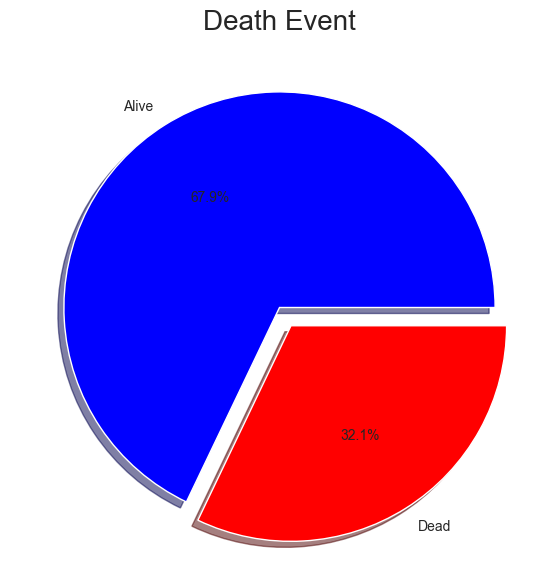

In [73]:
plt.figure(figsize=(7,7))
plt.pie(df['death_event'].value_counts(),labels=['Alive','Dead'],autopct='%1.1f%%',shadow=True,explode=[0,0.1], colors = ['blue','red'])
plt.title('Death Event',fontsize=20)
plt.show()

Now, let's plot GENDER against the Death Event, to see its relationship:
* A PLOT OF SEX AGAINST DEATH EVENT WILL SHOW THE RESULTS 

<AxesSubplot: xlabel='sex', ylabel='count'>

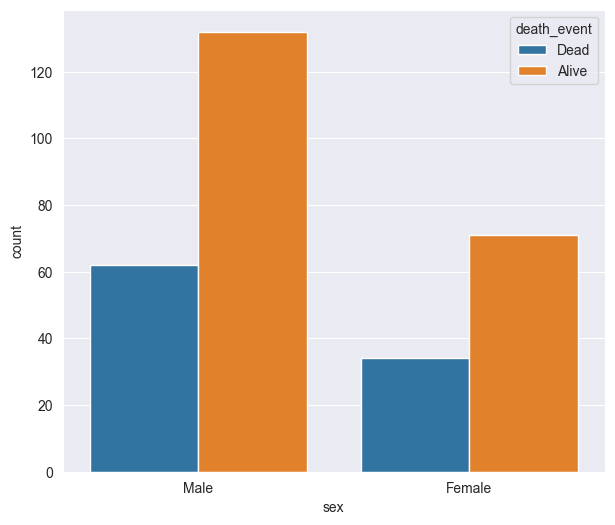

In [74]:
plt.figure(figsize=(7,6))
sns.countplot(x='sex',hue='death_event',data=df_vis)

From the plot above we can conclude that since the death count of the male is high, men compared to women are more likely enough to die from heart failure.

Now, let's plot AGE against the Death Event, to see its relationship:
* TO FIND OUT IF THERE IS A RELATIONSHIP BETWEEN AGE AND HEART FAILURE
* A LINEPLOT OF AGE AGAINST DEATH EVENT WILL SHOW THE RESULTS 

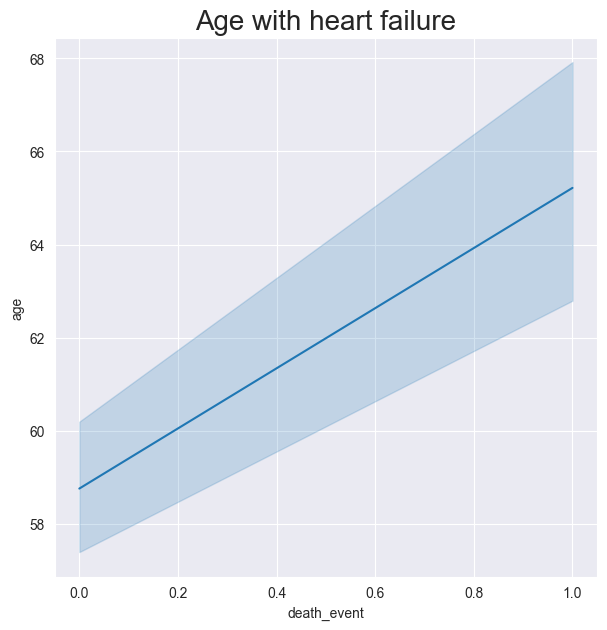

In [75]:
plt.figure(figsize=(7,7))
sns.lineplot(df,x='death_event',y='age')
plt.title('Age with heart failure',fontsize=20)
plt.show()

from the above lineplot we could conclude that older people are prone to succumbing to heart failure

TO FIND OUT IF THERE IS A RELATIONSHIP BETWEEN DIABETES AND HEART FAILURE
* A PLOT OF DIABETES AGAINST DEATH EVENT WILL SHOW THE RESULTS 

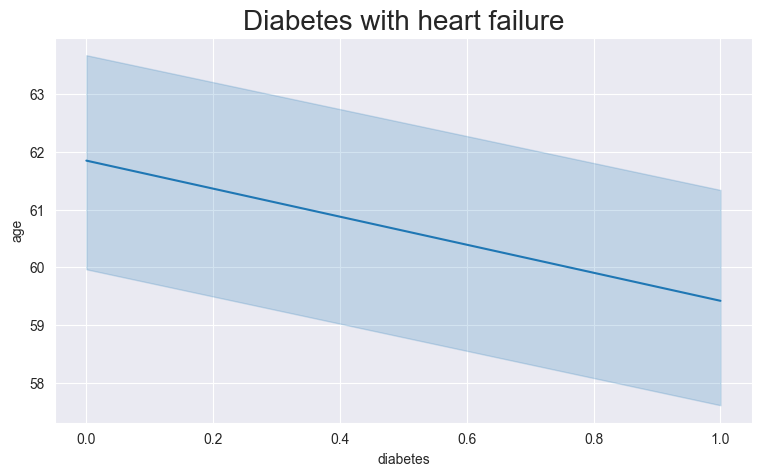

In [76]:
plt.figure(figsize=(9,5))
sns.lineplot(df,x='diabetes',y='age')
plt.title('Diabetes with heart failure',fontsize=20)
plt.show()

* A PLOT OF DIABETES AGAINST DEATH EVENT TO CONFIRM THE ABOVE RESULTS

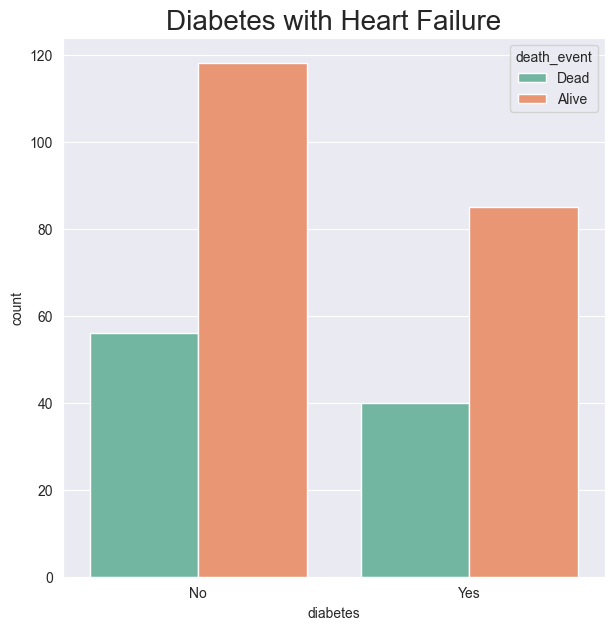

In [77]:
plt.figure(figsize=(7,7))
sns.countplot(x='diabetes',hue='death_event',data=df_vis, palette='Set2')
plt.title('Diabetes with Heart Failure',fontsize=20)
plt.show()

from the above plots we could conclude that there was no to little relation between people with or without diabetes and heart failure